In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

## pip install matplotlib-scalebar
# from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# fiji = gpd.read_file("fiji-land.geojson")
bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760")
fiji_provinces = gpd.read_file("fiji_provinces.geojson").to_crs("EPSG:32760")
fiji_full = gpd.read_file("fiji_full_bbox.geojson").to_crs("EPSG:32760")

<Axes: >

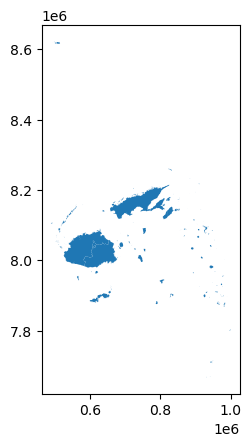

In [3]:
fiji_provinces.plot()

In [4]:
fiji_provinces = fiji_provinces.drop(3, axis=0)  # Drops the row with index 3
fiji_provinces = gpd.clip(fiji_provinces, fiji_full)
fiji_provinces

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
1,FJI.2_1,FJI,Fiji,Eastern,NA,NA,Division,Division,NA,FJ.EA,FJ-E,"MULTIPOLYGON (((828879.755 7894013.162, 828849..."
0,FJI.1_1,FJI,Fiji,Central,NA,NA,Division,Division,NA,FJ.CE,FJ-C,"MULTIPOLYGON (((613526.346 7961564.969, 613555..."
4,FJI.5_1,FJI,Fiji,Western,NA,NA,Division,Division,NA,FJ.W,FJ-W,"MULTIPOLYGON (((568313.216 7952486.422, 568285..."
2,FJI.3_1,FJI,Fiji,Northern,NA,NA,Division,Division,NA,FJ.NO,FJ-N,"MULTIPOLYGON (((724479.878 8107336.576, 724537..."


<Axes: >

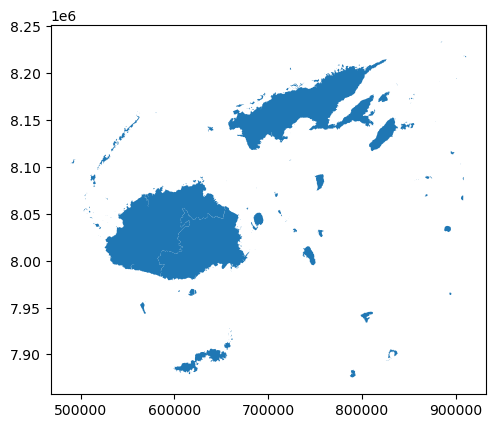

In [5]:
fiji_provinces.plot()

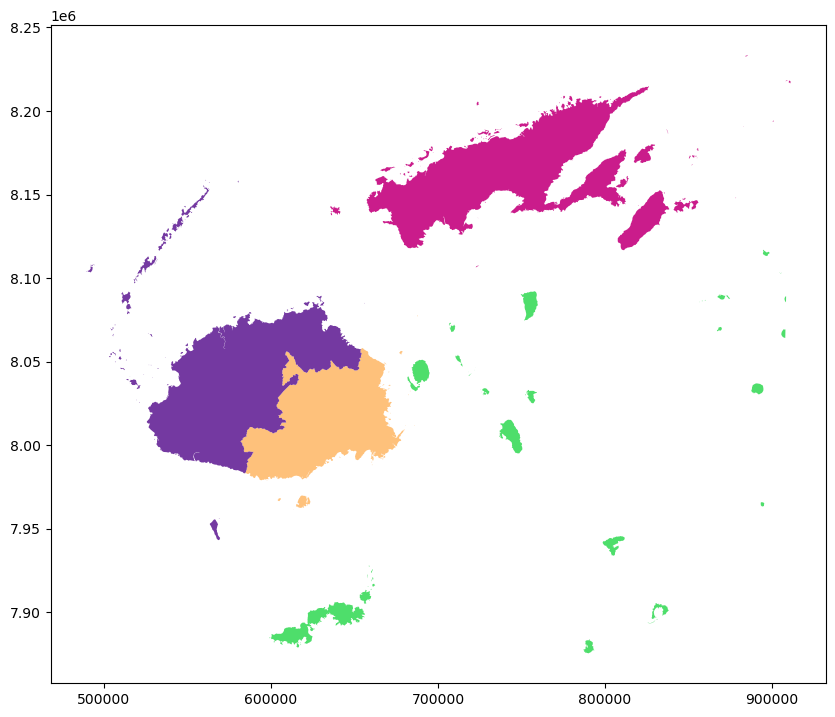

In [6]:
# Generate a random color for each row
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(fiji_provinces))]

# Plot each row with a different color
fig, ax = plt.subplots(figsize=(10, 10))
fiji_provinces.plot(ax=ax, color=colors)

# # # Define the crop extent (xmin, xmax, ymin, ymax)
# crop_extent = (7800000, 8200000, 500000, 1000000)  # Replace with your values
# # Set the x and y limits for cropping
# ax.set_xlim(crop_extent[0], crop_extent[1])
# ax.set_ylim(crop_extent[2], crop_extent[3])

# Show the cropped plot
plt.show()


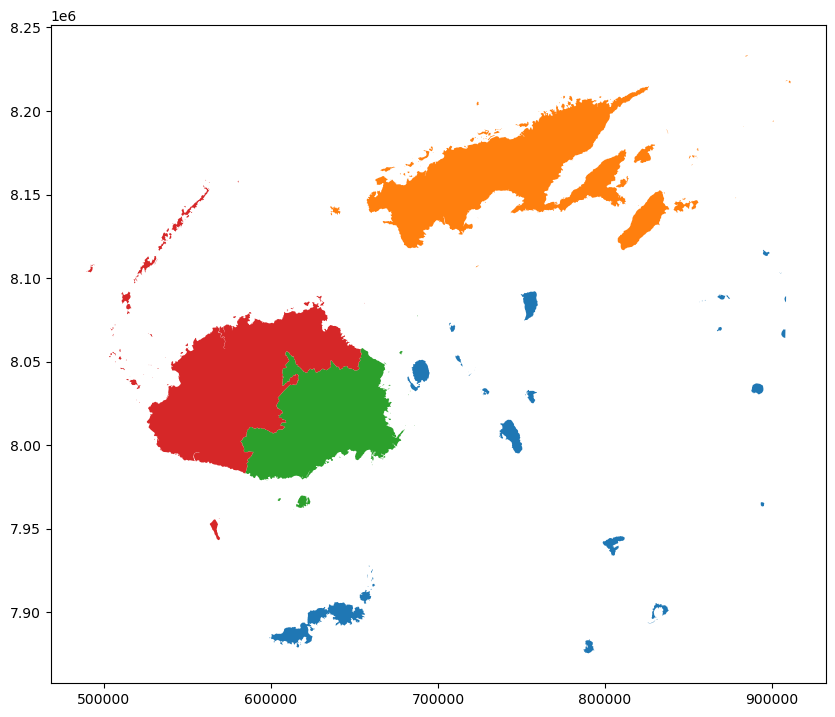

In [7]:
# Generate a random color for each row
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'turquoise', 'tab:brown']

# Plot each row with a different color
fig, ax = plt.subplots(figsize=(10, 10))
fiji_provinces.plot(ax=ax, color=colors)

# # # Define the crop extent (xmin, xmax, ymin, ymax)
# crop_extent = (7800000, 8200000, 500000, 1000000)  # Replace with your values
# # Set the x and y limits for cropping
# ax.set_xlim(crop_extent[0], crop_extent[1])
# ax.set_ylim(crop_extent[2], crop_extent[3])

# Show the cropped plot
plt.show()


In [8]:

# Function to add a scale bar
def add_scalebar(ax, location=(0.1, 0.05), length=100, label='100 km', fontsize=10):
    """
    Adds a scale bar to the plot.
    Parameters:
        ax: The matplotlib axis.
        location: Tuple (x, y) for the scale bar position in axis coordinates.
        length: Length of the scale bar in map units.
        label: Label for the scale bar.
        fontsize: Font size for the label.
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    bar_start = xlim[0] + (xlim[1] - xlim[0]) * location[0]
    bar_end = bar_start + length
    bar_y = ylim[0] + (ylim[1] - ylim[0]) * location[1]

    ax.plot([bar_start, bar_end], [bar_y, bar_y], color='black', linewidth=3)
    ax.text((bar_start + bar_end) / 2, bar_y - (ylim[1] - ylim[0]) * 0.02, label,
            ha='center', va='top', fontsize=fontsize, color='black')

# Function to add a north arrow
def add_north_arrow(ax, location=(0.9, 0.9), size=20):
    """
    Adds a north arrow to the plot.
    Parameters:
        ax: The matplotlib axis.
        location: Tuple (x, y) for the north arrow position in axis coordinates.
        size: Font size for the north arrow.
    """
    ax.annotate('N', xy=location, xytext=(location[0], location[1] - 0.07),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=size, xycoords='axes fraction')

import matplotlib.patches as mpatches  # Ensure this is imported

def add_legend(ax, labels_colors, loc='lower right', title=None):
    """
    Adds a custom legend to the plot with an optional title.

    Parameters:
        ax: The matplotlib axis.
        labels_colors: A dictionary where keys are labels and values are colors.
        loc: The location of the legend (default is 'lower right').
        title: The title of the legend (default is None).
    """
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in labels_colors.items()]
    ax.legend(handles=legend_patches, loc=loc, fontsize=10, frameon=True, title=title, title_fontsize=12)

# Assign colors to categories (modify as needed)
category_colors_fj = {'Northern': 'tab:orange', 'Western': 'tab:red', 'Central': 'tab:green', 'Eastern': 'tab:blue'}


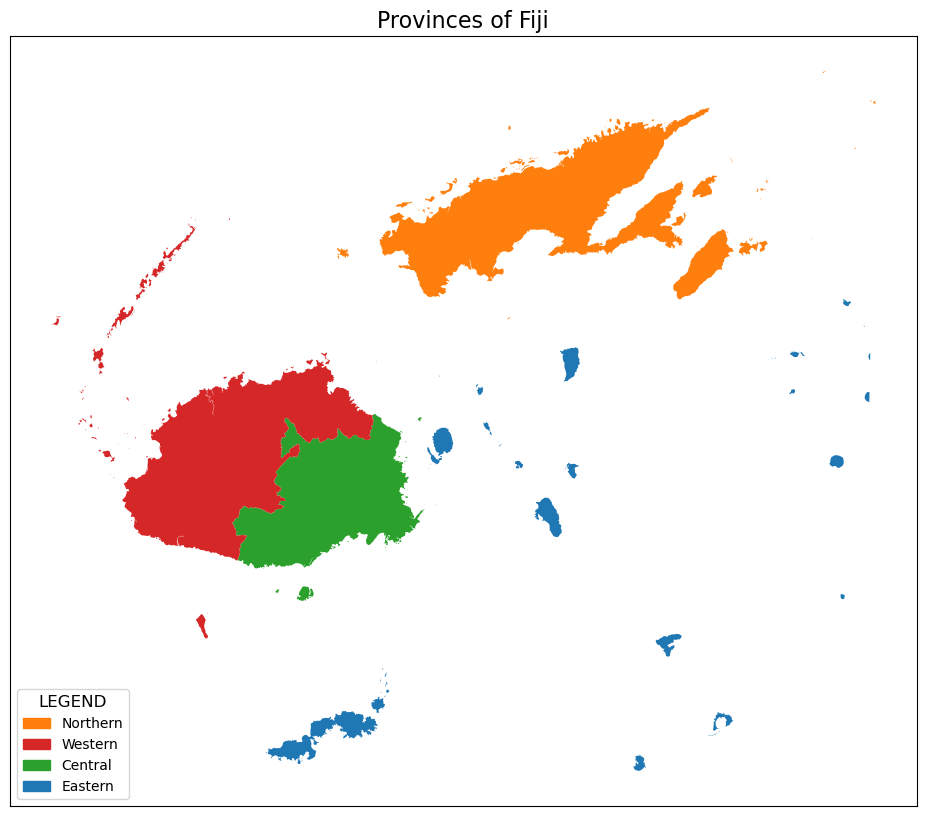

In [9]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

# Plot your map
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'turquoise', 'tab:brown']
fiji_provinces.to_crs("EPSG:32760").plot(ax=ax, color=colors)


# Add scale bar, north arrow, legend
# add_scalebar(ax, length=1, location='lower left', label='100 km')
# add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_fj, loc='lower left', title='LEGEND')

# Add grid and title
# ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Fiji", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Remove ticks
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels

# Save correctly
plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

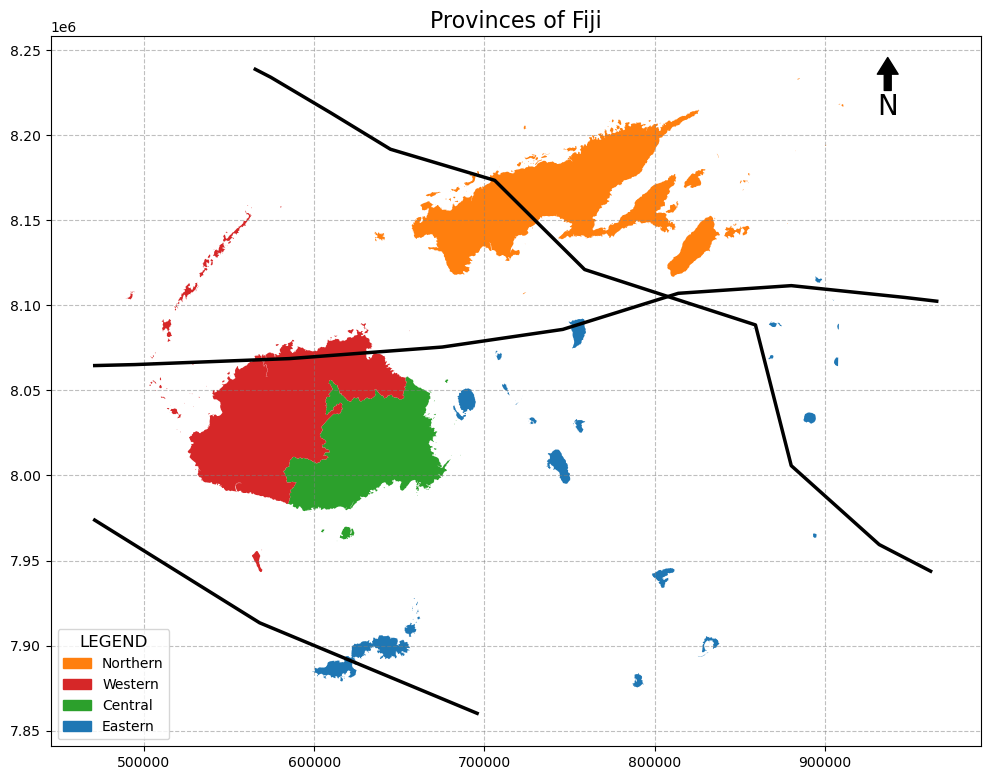

In [10]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

# Define new bbox
fiji_bbox_2 = gpd.read_file("tc_tracks/bbox_fiji_2.geojson").to_crs("EPSG:32760")

# Load TC tracks
winston = gpd.read_file("tc_tracks/tc_winston_line.geojson").to_crs("EPSG:32760").clip(fiji_bbox_2)
harold = gpd.read_file("tc_tracks/tc_harold_line.geojson").to_crs("EPSG:32760").clip(fiji_bbox_2)
yasa = gpd.read_file("tc_tracks/tc_yasa_line.geojson").to_crs("EPSG:32760").clip(fiji_bbox_2)

# Plot your map
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'turquoise', 'tab:brown']
fiji_provinces.to_crs("EPSG:32760").plot(ax=ax, color=colors)
winston.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5) 
harold.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5)
yasa.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5)

# Add scale bar, north arrow, legend
# add_scalebar(ax, length=1, location='lower left', label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_fj, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Fiji", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

## Remove ticks
# ax.set_xticks([])  # Remove x-axis ticks
# ax.set_yticks([])  # Remove y-axis ticks
# ax.set_xticklabels([])  # Remove x-axis labels
# ax.set_yticklabels([])  # Remove y-axis labels

# Save correctly
plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

In [11]:
# import matplotlib.pyplot as plt
# from matplotlib_scalebar.scalebar import ScaleBar
# from matplotlib_scalebar.arrow_north import NorthArrow

# --- Re-defining your placeholder functions with real implementations ---
def add_scalebar(ax, units='km', location='lower left', color='black'):
    """
    Adds a scale bar to the given matplotlib axis using a dedicated library.
    
    Args:
        ax (matplotlib.axes.Axes): The axis to add the scale bar to.
        units (str): The units of the scale bar ('km', 'mi', 'm', 'ft').
        location (str): The location on the plot ('lower left', 'lower right', etc.).
        color (str): The color of the scale bar lines and text.
    """
    scalebar = ScaleBar(1, units=units, location=location, frameon=False,
                        color=color, font_properties={'size': 12})
    ax.add_artist(scalebar)

In [12]:
 # --- Re-defining your placeholder functions with real implementations ---
def add_scalebar(ax, units='km', location='lower left', color='black'):
    """
    Adds a scale bar to the given matplotlib axis using a dedicated library.
    
    Args:
        ax (matplotlib.axes.Axes): The axis to add the scale bar to.
        units (str): The units of the scale bar ('km', 'mi', 'm', 'ft').
        location (str): The location on the plot ('lower left', 'lower right', etc.).
        color (str): The color of the scale bar lines and text.
    """
    scalebar = ScaleBar(1, units=units, location=location, frameon=False,
                        color=color, font_properties={'size': 12})
    ax.add_artist(scalebar)


In [13]:
# # Generate a random color for each row
# colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange', 'turquoise', 'tab:brown']


# # Plot each row with a different color
# fig, ax = plt.subplots(figsize=(10, 10))
# fiji_provinces.plot(ax=ax, color=colors)

# # # Define the crop extent (xmin, xmax, ymin, ymax)
# crop_extent = (500000, 1000000, 50000, 100000)  # Replace with your values
# # Set the x and y limits for cropping
# ax.set_xlim(crop_extent[0], crop_extent[1])
# ax.set_ylim(crop_extent[2], crop_extent[3])

# # Show the cropped plot
# plt.show()


In [14]:
# bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson")
# vanuatu = gpd.read_file("vanuatu-land.geojson")
vanuatu_provinces = gpd.read_file("vanuatu_provinces.geojson")

In [15]:
vanuatu_provinces

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,VUT.1_1,VUT,Vanuatu,Malampa,NA,NA,Province,Province,NA,VU.ML,NA,"MULTIPOLYGON (((167.78488 -16.55431, 167.78456..."
1,VUT.2_1,VUT,Vanuatu,Penama,NA,NA,Province,Province,NA,VU.PM,NA,"MULTIPOLYGON (((168.15001 -15.77233, 168.15001..."
2,VUT.3_1,VUT,Vanuatu,Sanma,NA,NA,Province,Province,NA,VU.SN,NA,"MULTIPOLYGON (((167.13048 -15.6273, 167.13055 ..."
3,VUT.4_1,VUT,Vanuatu,Shefa,NA,NA,Province,Province,NA,VU.SE,VU-SEE,"MULTIPOLYGON (((168.33778 -17.8, 168.33765 -17..."
4,VUT.5_1,VUT,Vanuatu,Tafea,NA,NA,Province,Province,NA,VU.TF,VU-TAE,"MULTIPOLYGON (((169.77388 -20.24762, 169.77502..."
5,VUT.6_1,VUT,Vanuatu,Torba,NA,NA,Province,Province,NA,VU.TR,VU-TOB,"MULTIPOLYGON (((168.03999 -14.43917, 168.04028..."


<Axes: >

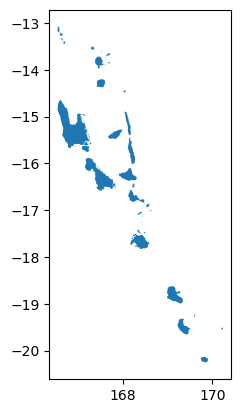

In [16]:
vanuatu_provinces.plot()

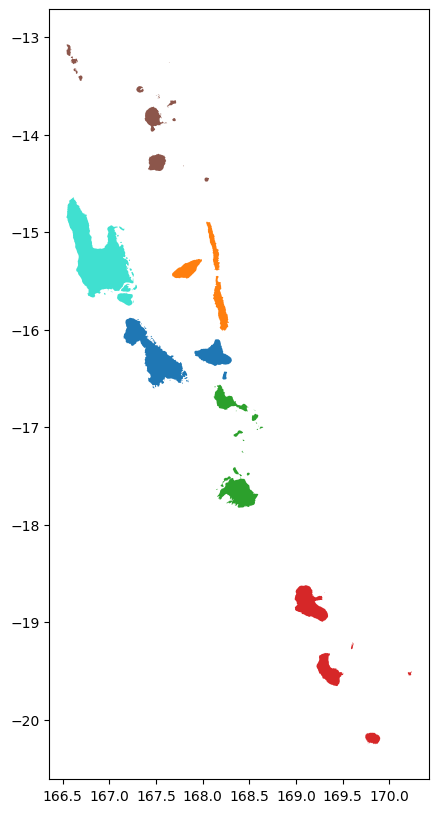

In [17]:
# Generate a random color for each row
colors = ['tab:blue', 'tab:orange', 'turquoise', 'tab:green', 'tab:red', 'tab:brown']

# Plot each row with a different color
fig, ax = plt.subplots(figsize=(10, 10))
vanuatu_provinces.plot(ax=ax, color=colors)

# # # Define the crop extent (xmin, xmax, ymin, ymax)
# crop_extent = (7800000, 8200000, 500000, 1000000)  # Replace with your values
# # Set the x and y limits for cropping
# ax.set_xlim(crop_extent[0], crop_extent[1])
# ax.set_ylim(crop_extent[2], crop_extent[3])

# Show the cropped plot
plt.show()


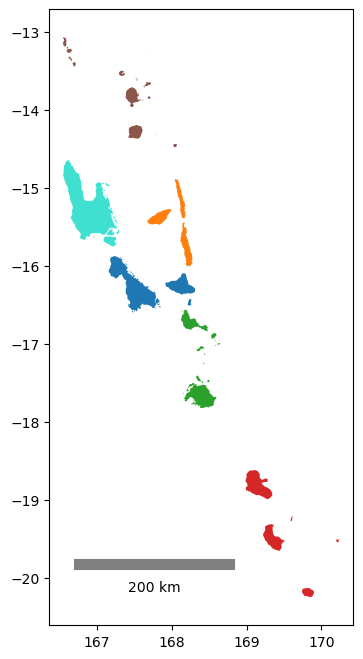

In [18]:
def add_scalebar(ax, location=(0.1, 0.1), length=2.0, label='200 km', fontsize=10):
    """
    Adds a scale bar to the plot.
    Parameters:
        ax: The matplotlib axis.
        location: Tuple of the scale bar's position (x, y) in axis coordinates.
        length: Length of the scale bar in map units.
        label: Label for the scale bar.
        fontsize: Font size for the label.
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Calculate the scale bar start and end points
    bar_start = xlim[0] + (xlim[1] - xlim[0]) * location[0]
    bar_end = bar_start + length
    bar_y = ylim[0] + (ylim[1] - ylim[0]) * location[1]
    
    # Add the scale bar line
    ax.plot([bar_start, bar_end], [bar_y, bar_y], color='grey', linewidth=8)
    
    # Add the scale bar label
    ax.text(bar_start + length / 2, bar_y - (ylim[1] - ylim[0]) * 0.05, label,
            ha='center', va='bottom', fontsize=fontsize)

# Usage in the plot
fig, ax = plt.subplots(figsize=(10, 8))
# vanuatu_provinces.plot(ax=ax, color=colors, edgecolor='black')
vanuatu_provinces.plot(ax=ax, color=colors)
add_scalebar(ax)
plt.show()


In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# # Load GeoJSON
# gdf = gpd.read_file("path_to_geojson.geojson")

# Function to add a scale bar
def add_scalebar(ax, location=(0.1, 0.05), length=100, label='100 km', fontsize=10):
    """
    Adds a scale bar to the plot.
    Parameters:
        ax: The matplotlib axis.
        location: Tuple (x, y) for the scale bar position in axis coordinates.
        length: Length of the scale bar in map units.
        label: Label for the scale bar.
        fontsize: Font size for the label.
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    bar_start = xlim[0] + (xlim[1] - xlim[0]) * location[0]
    bar_end = bar_start + length
    bar_y = ylim[0] + (ylim[1] - ylim[0]) * location[1]

    ax.plot([bar_start, bar_end], [bar_y, bar_y], color='black', linewidth=3)
    ax.text((bar_start + bar_end) / 2, bar_y - (ylim[1] - ylim[0]) * 0.02, label,
            ha='center', va='top', fontsize=fontsize, color='black')

# Function to add a north arrow
def add_north_arrow(ax, location=(0.9, 0.9), size=20):
    """
    Adds a north arrow to the plot.
    Parameters:
        ax: The matplotlib axis.
        location: Tuple (x, y) for the north arrow position in axis coordinates.
        size: Font size for the north arrow.
    """
    ax.annotate('N', xy=location, xytext=(location[0], location[1] - 0.07),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=size, xycoords='axes fraction')

import matplotlib.patches as mpatches  # Ensure this is imported

def add_legend(ax, labels_colors, loc='lower right', title=None):
    """
    Adds a custom legend to the plot with an optional title.

    Parameters:
        ax: The matplotlib axis.
        labels_colors: A dictionary where keys are labels and values are colors.
        loc: The location of the legend (default is 'lower right').
        title: The title of the legend (default is None).
    """
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in labels_colors.items()]
    ax.legend(handles=legend_patches, loc=loc, fontsize=10, frameon=True, title=title, title_fontsize=12)

# Assign colors to categories (modify as needed)
category_colors_vu = {'Torba': 'tab:brown', 'Sanma': 'turquoise', 'Penama': 'tab:orange', 'Malampa': 'tab:blue', 'Shefa': 'tab:green', 'Tafea': 'tab:red'}



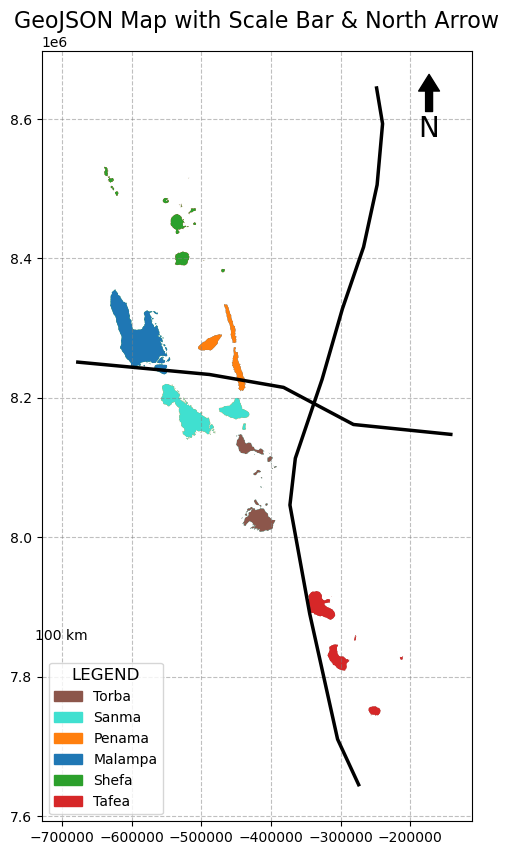

In [49]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 10))
vanuatu_provinces.plot(ax=ax, color=colors)

# Define new bbox
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:32760")


# # Load TC tracks
# pam = gpd.read_file("tc_tracks/tc_pam_line.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)
# harold = gpd.read_file("tc_tracks/tc_harold_line.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)
# # vanuatu_provinces = gpd.read_file("vanuatu_provinces.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)

colors = ['tab:red', 'tab:brown', 'turquoise', 'tab:orange', 'tab:blue', 'tab:green']
category_colors_vu = {'Torba': 'tab:brown', 'Sanma': 'turquoise', 'Penama': 'tab:orange', 'Malampa': 'tab:blue', 'Shefa': 'tab:green', 'Tafea': 'tab:red'}


# # Plot your map
# # colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'turquoise', 'tab:brown']
vanuatu_provinces.to_crs("EPSG:32760").plot(ax=ax, color=colors)
pam.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5) 
harold.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')


# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("GeoJSON Map with Scale Bar & North Arrow", fontsize=16)

plt.show()

In [21]:
ax.set_axis_off()  # Hide axes for a clean map
plt.savefig("Vanuatu_Fig_3.jpg", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

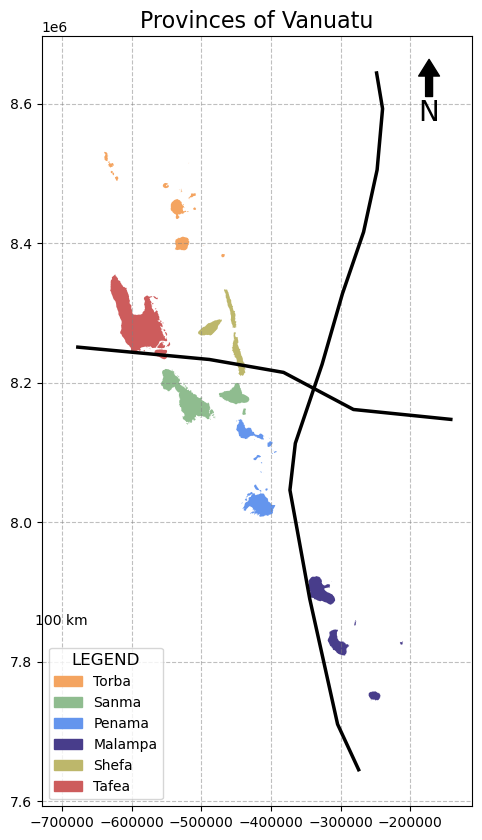

In [39]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

# Define new bbox
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:32760")

# fiji_bbox_2 = gpd.read_file("tc_tracks/bbox_fiji_2.geojson").to_crs("EPSG:32760")

# Load TC tracks
pam = gpd.read_file("tc_tracks/tc_pam_line.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)
harold = gpd.read_file("tc_tracks/tc_harold_line.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)
vanuatu_provinces = gpd.read_file("vanuatu_provinces.geojson").to_crs("EPSG:32760").clip(bbox_vanuatu)

# Plot your map
# colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'turquoise', 'tab:brown']
# fiji_provinces.to_crs("EPSG:32760").plot(ax=ax, color=colors)
pam.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5) 
harold.to_crs("EPSG:32760").plot(ax=ax, color='black', linewidth=2.5)

# Plot your map
vanuatu_provinces.plot(ax=ax, color=colors)


# # Add scale bar, north arrow, legend
# add_scalebar(ax, length=1, location=(0.15, 0.3), label='100 km')
# add_north_arrow(ax, location=(0.9, 0.97))
# add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

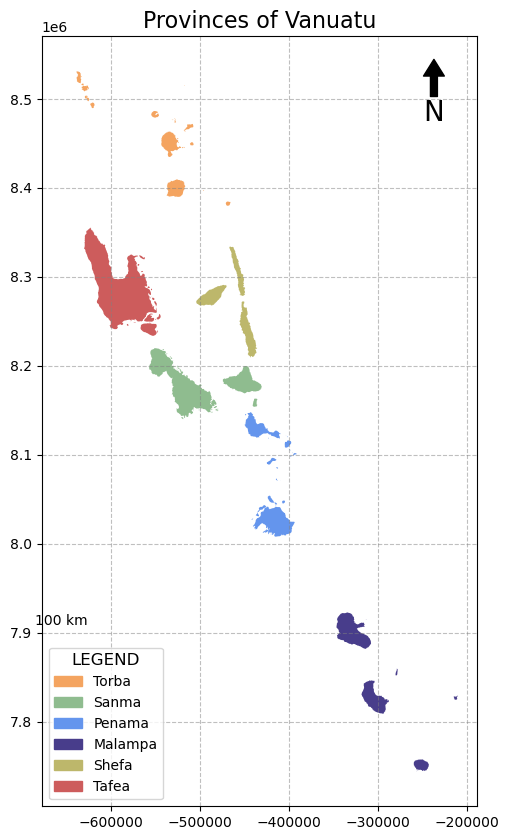

In [23]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

colors = ['#483D8B', '#6495ED', '#8FBC8F', '#BDB76B', '#CD5C5C', '#F4A460']
category_colors_vu = {'Torba': '#F4A460', 'Sanma': '#8FBC8F', 'Penama': '#6495ED', 'Malampa': '#483D8B', 'Shefa': '#BDB76B', 'Tafea': '#CD5C5C'}


# Plot your map
vanuatu_provinces.plot(ax=ax, color=colors)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
# plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

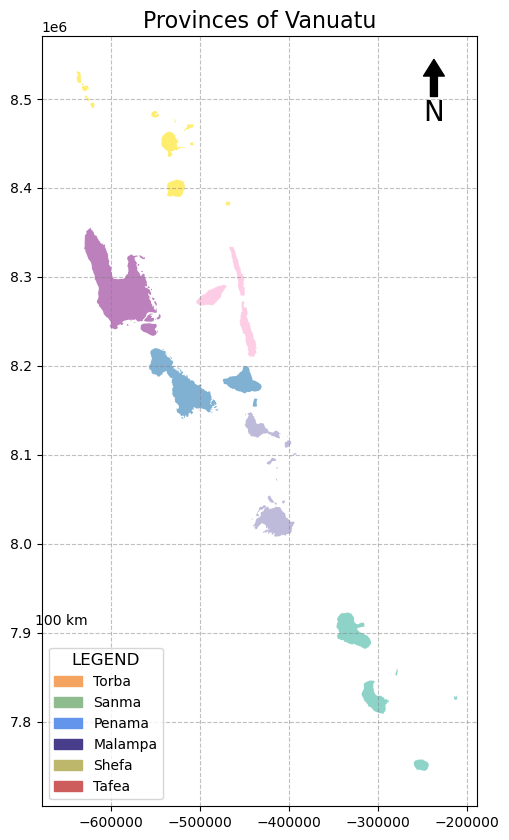

In [24]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

cmap = 'Set3'
category_colors_vu = {'Torba': '#F4A460', 'Sanma': '#8FBC8F', 'Penama': '#6495ED', 'Malampa': '#483D8B', 'Shefa': '#BDB76B', 'Tafea': '#CD5C5C'}


# Plot your map
vanuatu_provinces.plot(ax=ax, cmap=cmap)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
# plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

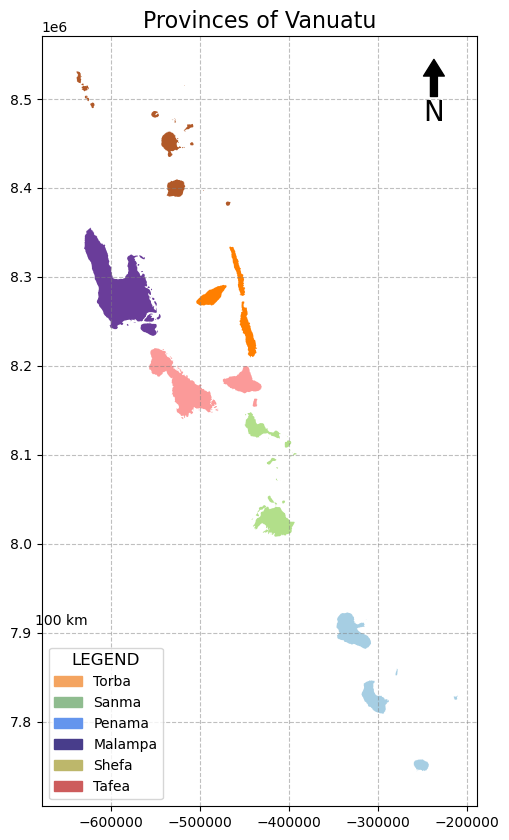

In [25]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

cmap = 'Paired'
category_colors_vu = {'Torba': '#F4A460', 'Sanma': '#8FBC8F', 'Penama': '#6495ED', 'Malampa': '#483D8B', 'Shefa': '#BDB76B', 'Tafea': '#CD5C5C'}


# Plot your map
vanuatu_provinces.plot(ax=ax, cmap=cmap)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
# plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

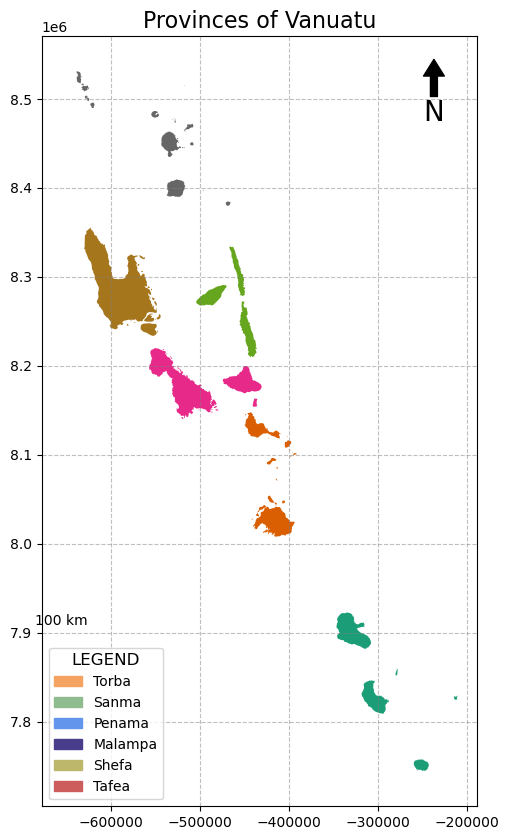

In [26]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

cmap = 'Dark2'
category_colors_vu = {'Torba': '#F4A460', 'Sanma': '#8FBC8F', 'Penama': '#6495ED', 'Malampa': '#483D8B', 'Shefa': '#BDB76B', 'Tafea': '#CD5C5C'}


# Plot your map
vanuatu_provinces.plot(ax=ax, cmap=cmap)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
# plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

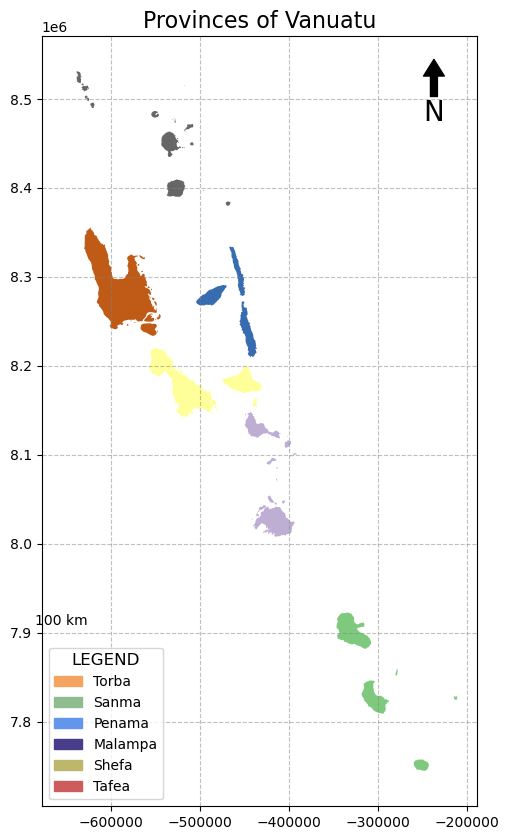

In [27]:
# Ensure the figure and axis are properly defined
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_facecolor("white")  # Set background color

cmap = 'Accent'
category_colors_vu = {'Torba': '#F4A460', 'Sanma': '#8FBC8F', 'Penama': '#6495ED', 'Malampa': '#483D8B', 'Shefa': '#BDB76B', 'Tafea': '#CD5C5C'}


# Plot your map
vanuatu_provinces.plot(ax=ax, cmap=cmap)

# Add scale bar, north arrow, legend
add_scalebar(ax, length=1, location=(0.01, 0.27), label='100 km')
add_north_arrow(ax, location=(0.9, 0.97))
add_legend(ax, category_colors_vu, loc='lower left', title='LEGEND')

# Add grid and title
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_title("Provinces of Vanuatu", fontsize=16)

# Hide axis for a clean map
# ax.set_axis_off()

# Save correctly
# plt.savefig("output_map.png", dpi=300, bbox_inches='tight', facecolor='white')

# Show the plot (AFTER saving)
plt.show()

In [28]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Color Scheme Examples for Provinces in Vanuatu\n",
    "This notebook demonstrates different color schemes for visualizing provinces in Vanuatu, suitable for academic journals like Nature Climate Change."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import geopandas as gpd\n",
    "import matplotlib.pyplot as plt\n",
    "\n",
    "# Load your GeoDataFrame (replace with the actual file path)\n",
    "gdf = gpd.read_file('path_to_your_geojson_or_shapefile')\n",
    "\n",
    "# Example color schemes\n",
    "color_schemes = {\n",
    "    'ColorBrewer Qualitative - Set3': 'Set3',\n",
    "    'ColorBrewer Qualitative - Paired': 'Paired',\n",
    "    'ColorBrewer Qualitative - Dark2': 'Dark2',\n",
    "    'ColorBrewer Qualitative - Accent': 'Accent'\n",
    "}\n",
    "\n",
    "# Plotting the map with different color schemes\n",
    "fig, axes = plt.subplots(2, 2, figsize=(20, 10))\n",
    "axes = axes.flatten()\n",
    "\n",
    "for ax, (scheme_name, cmap) in zip(axes, color_schemes.items()):\n",
    "    gdf.plot(column='province', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')\n",
    "    ax.set_title(scheme_name)\n",
    "    ax.axis('off')\n",
    "\n",
    "plt.tight_layout()\n",
    "plt.show()"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.8"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}

{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': ['# Color Scheme Examples for Provinces in Vanuatu\n',
    'This notebook demonstrates different color schemes for visualizing provinces in Vanuatu, suitable for academic journals like Nature Climate Change.']},
  {'cell_type': 'code',
   'execution_count': 1,
   'metadata': {},
   'outputs': [],
   'source': ['import geopandas as gpd\n',
    'import matplotlib.pyplot as plt\n',
    '\n',
    '# Load your GeoDataFrame (replace with the actual file path)\n',
    "gdf = gpd.read_file('path_to_your_geojson_or_shapefile')\n",
    '\n',
    '# Example color schemes\n',
    'color_schemes = {\n',
    "    'ColorBrewer Qualitative - Set3': 'Set3',\n",
    "    'ColorBrewer Qualitative - Paired': 'Paired',\n",
    "    'ColorBrewer Qualitative - Dark2': 'Dark2',\n",
    "    'ColorBrewer Qualitative - Accent': 'Accent'\n",
    '}\n',
    '\n',
    '# Plotting the map with different color schemes\n',
    'fig, axes = plt.subpl